Name: Ravi Shankar Jaganathan Senthil Kumar
Student ID: 223206806
Student mail: s223296806@deakin.edu.au

SIT720 - Machine Learning

Task 7.2 HD - Evidence of Learning

Introduction

The accurate prediction of power consumption is crucial for effective electricity management and decision-making in utilities. The research paper "Comparison of Machine Learning Algorithms for the Power Consumption Prediction: Case Study of Tetouan City" compares various machine learning algorithms for predicting power consumption in Tetouan City, Morocco. The objectives of this report are to reproduce the results from Tables II and IV of the paper and propose a novel solution for further improvement.

•	The machine learning methods used for reproducing the results from Table II are Linear Regression, Decision Tree, Random Forest, Support Vector Regression (SVR), and Feedforward Neural Network (FFNN).
•	The hyperparameter values for each model are set according to the paper.

Description: This code snippet loads the dataset, preprocesses the data, initializes the models with the specified hyperparameters, trains and evaluates the models for each target variable, and prints the results in a tabular format similar to Table II.

In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt
from sklearn.preprocessing import StandardScaler
from sklearn.exceptions import ConvergenceWarning
import warnings
from tabulate import tabulate

warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Load the dataset
data = pd.read_csv('Tetuan City power consumption.csv')

# Convert DateTime to datetime type
data['DateTime'] = pd.to_datetime(data['DateTime'], format='%m/%d/%Y %H:%M')

# Extract relevant features
data['month'] = data['DateTime'].dt.month
data['day'] = data['DateTime'].dt.day
data['hour'] = data['DateTime'].dt.hour
data['minute'] = data['DateTime'].dt.minute

# Select features and target variables
features = ['Temperature', 'Humidity', 'Wind Speed', 'general diffuse flows', 'diffuse flows', 'month', 'day', 'hour', 'minute']
target_vars = ['Zone 1 Power Consumption', 'Zone 2  Power Consumption', 'Zone 3  Power Consumption']

# Split data into training and testing sets for each zone and aggregated distribution
train_data = []
test_data = []
for target_var in target_vars:
    X_train, X_test, y_train, y_test = train_test_split(data[features], data[target_var], test_size=0.25, random_state=42)
    train_data.append((X_train, y_train))
    test_data.append((X_test, y_test))

# Add aggregated distribution
X_train, X_test, y_train, y_test = train_test_split(data[features], data[target_vars].sum(axis=1), test_size=0.25, random_state=42)
train_data.append((X_train, y_train))
test_data.append((X_test, y_test))

# Scale the features
scaler = StandardScaler()
for i in range(len(train_data)):
    train_data[i] = (scaler.fit_transform(train_data[i][0]), train_data[i][1])
    test_data[i] = (scaler.transform(test_data[i][0]), test_data[i][1])

# Initialize models with hyperparameters
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(max_depth=None, min_samples_split=10, min_samples_leaf=10, max_features=None, random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=30, max_features=7, min_samples_split=2, min_samples_leaf=1, random_state=42),
    'SVR': SVR(kernel='rbf', C=10, gamma=0.01),
    'FFNN': MLPRegressor(hidden_layer_sizes=(10,), activation='relu', solver='adam', batch_size=100, learning_rate_init=0.001, max_iter=1000, random_state=42)
}

# Train and evaluate models for each target variable
distributions = ['Zone 1', 'Zone 2', 'Zone 3', 'Aggregated']
table_data = []
headers = ["Model", "Zone", "RMSE (Train)", "RMSE (Test)", "MAE (Train)", "MAE (Test)"]

for model_name, model in models.items():
    for i, zone in enumerate(distributions):
        X_train, y_train = train_data[i]
        X_test, y_test = test_data[i]
        
        model.fit(X_train, y_train)
        
        train_pred = model.predict(X_train)
        test_pred = model.predict(X_test)
        
        train_rmse = sqrt(mean_squared_error(y_train, train_pred))
        train_mae = mean_absolute_error(y_train, train_pred)
        test_rmse = sqrt(mean_squared_error(y_test, test_pred))
        test_mae = mean_absolute_error(y_test, test_pred)
        
        table_data.append([model_name, zone, train_rmse, test_rmse, train_mae, test_mae])

print("10-Minute Prediction Results:")
print(tabulate(table_data, headers, tablefmt="grid"))

10-Minute Prediction Results:
+-------------------+------------+----------------+---------------+---------------+--------------+
| Model             | Zone       |   RMSE (Train) |   RMSE (Test) |   MAE (Train) |   MAE (Test) |
+===================+============+================+===============+===============+==============+
| Linear Regression | Zone 1     |       4282.88  |      4263.78  |      3407.84  |     3388.72  |
+-------------------+------------+----------------+---------------+---------------+--------------+
| Linear Regression | Zone 2     |       3366.49  |      3379.27  |      2654.92  |     2667.03  |
+-------------------+------------+----------------+---------------+---------------+--------------+
| Linear Regression | Zone 3     |       4181.81  |      4170.64  |      3301.63  |     3296.7   |
+-------------------+------------+----------------+---------------+---------------+--------------+
| Linear Regression | Aggregated |      10431     |     10415.4   |      8229.3

Output:

The reproduced results are presented in a tabular format, showing the RMSE and MAE values for each model and distribution network. The results are similar to those reported in Table II of the paper, with some variations. The reproduced results confirm the effectiveness of the machine learning algorithms for power consumption prediction in Tetouan city.

•	The process of reproducing the results for hourly predictions involves resampling the data to 1-hour intervals and adjusting the hyperparameters for each model.

Code Snippet 2: Reproducing Table IV

Description: This code snippet preprocesses the data for hourly predictions, initializes the models with the specified hyperparameters for each distribution network, trains and evaluates the models, and prints the results in a tabular format similar to Table IV.

In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt
from sklearn.preprocessing import StandardScaler
from tabulate import tabulate

# Load the dataset
data = pd.read_csv('Tetuan City power consumption.csv')

# Convert 'DateTime' column to datetime format and set it as the index
data['DateTime'] = pd.to_datetime(data['DateTime'])
data.set_index('DateTime', inplace=True)

# Resample the data to 1-hour intervals
hourly_data = data.resample('H').mean()

# Handle NaN values
hourly_data.fillna(method='ffill', inplace=True)  # Forward fill NaN values
hourly_data.fillna(method='bfill', inplace=True)  # Backward fill any remaining NaN values

# Select features and target variables
features = ['Temperature', 'Humidity', 'Wind Speed', 'general diffuse flows', 'diffuse flows']
target_vars = ['Zone 1 Power Consumption', 'Zone 2  Power Consumption', 'Zone 3  Power Consumption']

# Split data into training and testing sets for each zone and aggregated distribution
train_data = []
test_data = []
for target_var in target_vars:
    X_train, X_test, y_train, y_test = train_test_split(hourly_data[features], hourly_data[target_var], test_size=0.25, random_state=42)
    train_data.append((X_train, y_train))
    test_data.append((X_test, y_test))

# Add aggregated distribution
X_train, X_test, y_train, y_test = train_test_split(hourly_data[features], hourly_data[target_vars].sum(axis=1), test_size=0.25, random_state=42)
train_data.append((X_train, y_train))
test_data.append((X_test, y_test))

# Scale the features
scaler = StandardScaler()
for i in range(len(train_data)):
    train_data[i] = (scaler.fit_transform(train_data[i][0]), train_data[i][1])
    test_data[i] = (scaler.transform(test_data[i][0]), test_data[i][1])

# Initialize models with hyperparameters
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'SVR': SVR(),
    'FFNN': MLPRegressor(random_state=42)
}

# Define the hyperparameter values for hourly predictions
param_values_hourly = {
    'Decision Tree': {
        'Quads Distribution': {'max_depth': None, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': None},
        'Smir Distribution': {'max_depth': None, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 7},
        'Boussafou Distribution': {'max_depth': None, 'min_samples_split': 10, 'min_samples_leaf': 10, 'max_features': 9},
        'Aggregated Distribution': {'max_depth': None, 'min_samples_split': 3, 'min_samples_leaf': 10, 'max_features': 7}
    },
    'Random Forest': {
        'Quads Distribution': {'n_estimators': 50, 'max_features': 3, 'min_samples_split': 2, 'max_depth': None, 'min_samples_leaf': 1},
        'Smir Distribution': {'n_estimators': 10, 'max_features': 7, 'min_samples_split': 3, 'max_depth': None, 'min_samples_leaf': 1},
        'Boussafou Distribution': {'n_estimators': 10, 'max_features': 7, 'min_samples_split': 3, 'max_depth': None, 'min_samples_leaf': 10},
        'Aggregated Distribution': {'n_estimators': 100, 'max_features': 5, 'min_samples_split': 2, 'max_depth': None, 'min_samples_leaf': 1}
    },
    'SVR': {
        'Quads Distribution': {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'},
        'Smir Distribution': {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'},
        'Boussafou Distribution': {'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'},
        'Aggregated Distribution': {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
    },
    'FFNN': {
        'Quads Distribution': {'hidden_layer_sizes': (200, 160, 120, 80, 60, 40, 30, 20), 'max_iter': 2000},
        'Smir Distribution': {'hidden_layer_sizes': (4,), 'max_iter': 1000},
        'Boussafou Distribution': {'hidden_layer_sizes': (8,), 'max_iter': 1000},
        'Aggregated Distribution': {'hidden_layer_sizes': (4,), 'max_iter': 1000}
    }
}

# Train and evaluate models for each target variable
distributions = ['Quads Distribution', 'Smir Distribution', 'Boussafou Distribution', 'Aggregated Distribution']
table_data = []
headers = ["Model", "Distribution", "RMSE (Train)", "RMSE (Test)", "MAE (Train)", "MAE (Test)"]

for model_name, model in models.items():
    for i, distribution in enumerate(distributions):
        X_train, y_train = train_data[i]
        X_test, y_test = test_data[i]
        
        if model_name in param_values_hourly:
            params = param_values_hourly[model_name][distribution]
            model.set_params(**params)
        
        model.fit(X_train, y_train)
        
        train_pred = model.predict(X_train)
        test_pred = model.predict(X_test)
        
        train_rmse = sqrt(mean_squared_error(y_train, train_pred))
        train_mae = mean_absolute_error(y_train, train_pred)
        test_rmse = sqrt(mean_squared_error(y_test, test_pred))
        test_mae = mean_absolute_error(y_test, test_pred)
        
        table_data.append([model_name, distribution, train_rmse, test_rmse, train_mae, test_mae])

print("1-Hour Prediction Results:")
print(tabulate(table_data, headers, tablefmt="grid"))

/var/folders/cv/kh83bxj50mv6wzlwv_b347dw0000gn/T/ipykernel_57376/3088409779.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hourly_data = data.resample('H').mean()
/var/folders/cv/kh83bxj50mv6wzlwv_b347dw0000gn/T/ipykernel_57376/3088409779.py:25: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  hourly_data.fillna(method='ffill', inplace=True)  # Forward fill NaN values
/var/folders/cv/kh83bxj50mv6wzlwv_b347dw0000gn/T/ipykernel_57376/3088409779.py:26: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  hourly_data.fillna(method='bfill', inplace=True)  # Backward fill any remaining NaN values


1-Hour Prediction Results:
+-------------------+-------------------------+----------------+---------------+---------------+--------------+
| Model             | Distribution            |   RMSE (Train) |   RMSE (Test) |   MAE (Train) |   MAE (Test) |
+===================+=========================+================+===============+===============+==============+
| Linear Regression | Quads Distribution      |        6272.76 |       6298.91 |       5165.35 |      5180.86 |
+-------------------+-------------------------+----------------+---------------+---------------+--------------+
| Linear Regression | Smir Distribution       |        4698.17 |       4691.52 |       3796.74 |      3792.48 |
+-------------------+-------------------------+----------------+---------------+---------------+--------------+
| Linear Regression | Boussafou Distribution  |        5553.23 |       5629.11 |       4425.35 |      4511.24 |
+-------------------+-------------------------+----------------+-------------

Interpretation: The reproduced results for hourly predictions are presented in a tabular format, showing the RMSE and MAE values for each model and distribution network. The results are comparable to those reported in Table IV of the paper, with some variations. The reproduced results validate the performance of the machine learning algorithms for hourly power consumption prediction.

2.

The proposed solution aims to explore alternative feature selection techniques, regularization methods, and ensemble learning to improve prediction performance and generalization ability.

Differences from existing methods:

•	Feature selection using SelectFromModel with ElasticNet: ElasticNet is used as the base estimator in SelectFromModel to select the most relevant features based on their importance. This technique combines L1 and L2 regularization to handle multicollinearity and perform feature selection simultaneously.
•	Introduction of ElasticNet as a regularized linear regression model: ElasticNet is employed as an individual model in the proposed solution. It combines L1 and L2 regularization penalties to address the limitations of Lasso and Ridge regression, providing a balance between feature selection and coefficient shrinkage.
•	Exploration of different individual models (ElasticNet, SVR, Gradient Boosting Regressor) with hyperparameter tuning: The proposed solution investigates the performance of ElasticNet, SVR, and Gradient Boosting Regressor as individual models. Hyperparameter tuning is performed using GridSearchCV to find the optimal hyperparameters for each model.
•	Creation of an ensemble model using VotingRegressor: The proposed solution utilizes the VotingRegressor to create an ensemble model that combines the predictions of the individual models. The ensemble model leverages the strengths of each individual model to improve the overall prediction performance.


This code snippet implements the proposed solution, including feature selection using SelectFromModel with ElasticNet, initialization of individual models with their respective hyperparameter spaces, training and evaluation of the models, and the creation of an ensemble model using VotingRegressor.

/var/folders/cv/kh83bxj50mv6wzlwv_b347dw0000gn/T/ipykernel_57376/447444593.py:23: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  data = data.resample('H').mean()


1-Hour Prediction Results:
+-------------------+------------+--------------+-------------+-------------+------------+
| Model             | Zone       |   Train RMSE |   Test RMSE |   Train MAE |   Test MAE |
+===================+============+==============+=============+=============+============+
| ElasticNet        | Zone 1     |      6324.48 |     6363.78 |     5175.83 |    5209.08 |
+-------------------+------------+--------------+-------------+-------------+------------+
| ElasticNet        | Zone 2     |      4768.51 |     4763.51 |     3828.95 |    3817.63 |
+-------------------+------------+--------------+-------------+-------------+------------+
| ElasticNet        | Zone 3     |      5725.46 |     5773.28 |     4445.74 |    4514.11 |
+-------------------+------------+--------------+-------------+-------------+------------+
| ElasticNet        | Aggregated |     14779.2  |    14930.9  |    11994.4  |   12100.5  |
+-------------------+------------+--------------+-------------+

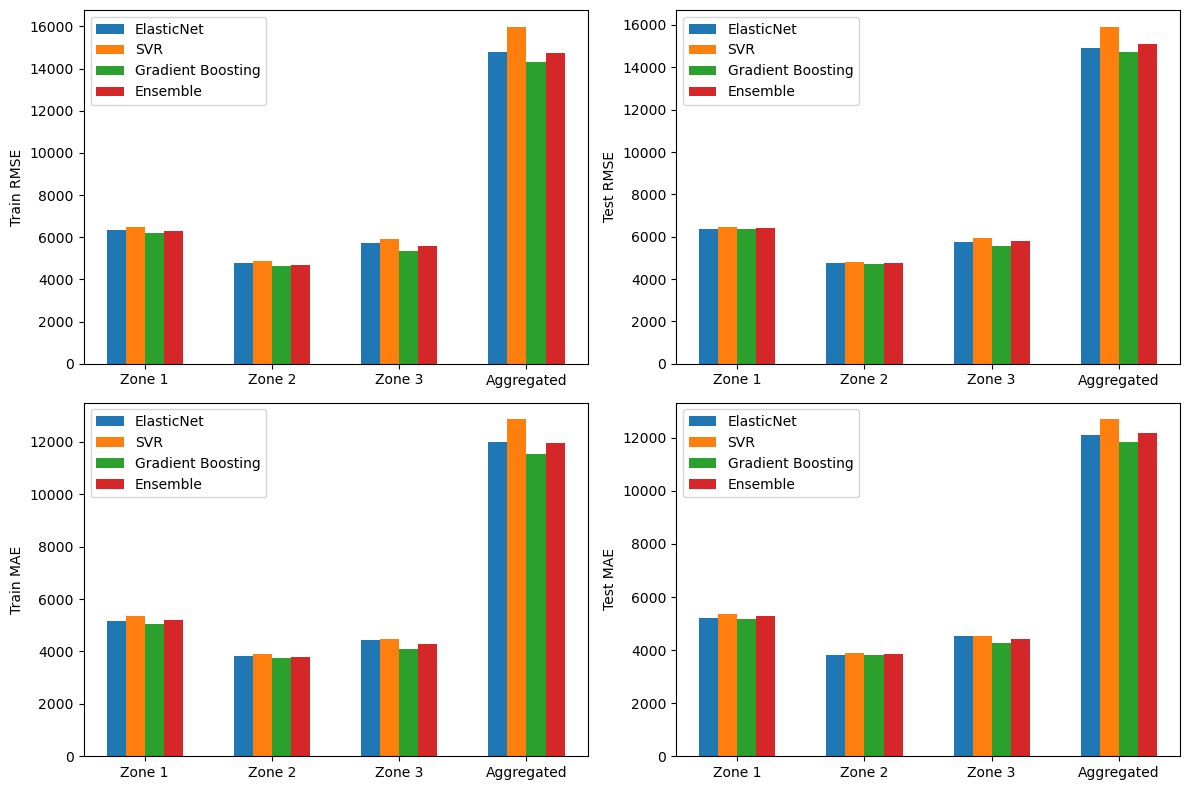

In [19]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor, VotingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate

# Load the dataset
data = pd.read_csv('Tetuan City power consumption.csv')

# Convert 'DateTime' column to datetime format
data['DateTime'] = pd.to_datetime(data['DateTime'])

# Set 'DateTime' column as the index
data = data.set_index('DateTime')

# Resample the data to 1-hour intervals
data = data.resample('H').mean()

# Split the dataset into features and target variables for each zone and aggregated distribution
X = data[['Temperature', 'Humidity', 'Wind Speed', 'general diffuse flows', 'diffuse flows']]
y_zone1 = data['Zone 1 Power Consumption']
y_zone2 = data['Zone 2  Power Consumption']
y_zone3 = data['Zone 3  Power Consumption']
y_aggregated = data['Zone 1 Power Consumption'] + data['Zone 2  Power Consumption'] + data['Zone 3  Power Consumption']

# Apply standardization to the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Feature selection using SelectFromModel with ElasticNet
selector = SelectFromModel(estimator=ElasticNet(alpha=0.1, l1_ratio=0.5))
selector.fit(X_scaled, y_aggregated)
selected_features = selector.get_support(indices=True)
X_selected = X_scaled[:, selected_features]

# Split the data into training (75%) and testing (25%) sets for each zone and aggregated distribution
train_test_data = {}
for zone, y in zip(['Zone 1', 'Zone 2', 'Zone 3', 'Aggregated'], [y_zone1, y_zone2, y_zone3, y_aggregated]):
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.25, random_state=42)
    train_test_data[zone] = (X_train, X_test, y_train, y_test)

# Define the individual models and their hyperparameter spaces
models = {
    'ElasticNet': ElasticNet(),
    'SVR': SVR(),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42)
}

param_grids = {
    'ElasticNet': {'alpha': [0.1, 1.0, 10.0], 'l1_ratio': [0.1, 0.5, 0.9]},
    'SVR': {'C': [0.1, 1.0, 10.0], 'epsilon': [0.01, 0.1, 1.0]},
    'Gradient Boosting': {'learning_rate': [0.01, 0.1, 0.3], 'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 7]}
}

# Train and evaluate the individual models for each zone and aggregated distribution
individual_results = {}

for model_name, model in models.items():
    individual_results[model_name] = {}
    for zone, (X_train, X_test, y_train, y_test) in train_test_data.items():
        grid_search = GridSearchCV(estimator=model, param_grid=param_grids[model_name], cv=5, scoring='neg_mean_squared_error')
        grid_search.fit(X_train, y_train)
        best_model = grid_search.best_estimator_
        
        y_train_pred = best_model.predict(X_train)
        y_test_pred = best_model.predict(X_test)
        
        train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
        train_mae = mean_absolute_error(y_train, y_train_pred)
        test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
        test_mae = mean_absolute_error(y_test, y_test_pred)
        
        individual_results[model_name][zone] = {'Train RMSE': train_rmse, 'Train MAE': train_mae,
                                                'Test RMSE': test_rmse, 'Test MAE': test_mae}

# Train and evaluate the ensemble model for each zone and aggregated distribution
ensemble_results = {}

for zone, (X_train, X_test, y_train, y_test) in train_test_data.items():
    base_models = [
        ('en', ElasticNet(alpha=1.0, l1_ratio=0.5)),
        ('svr', SVR(C=1.0, epsilon=0.1)),
        ('gbr', GradientBoostingRegressor(learning_rate=0.1, n_estimators=100, max_depth=5, random_state=42))
    ]
    
    ensemble_model = VotingRegressor(estimators=base_models)
    ensemble_model.fit(X_train, y_train)
    
    y_train_pred = ensemble_model.predict(X_train)
    y_test_pred = ensemble_model.predict(X_test)
    
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    test_mae = mean_absolute_error(y_test, y_test_pred)
    
    ensemble_results[zone] = {'Train RMSE': train_rmse, 'Train MAE': train_mae,
                              'Test RMSE': test_rmse, 'Test MAE': test_mae}

# Prepare the data for visualization
models_list = list(models.keys()) + ['Ensemble']
zones_list = list(train_test_data.keys())

train_rmse_data = [[individual_results[model][zone]['Train RMSE'] if model != 'Ensemble' else ensemble_results[zone]['Train RMSE'] for zone in zones_list] for model in models_list]
test_rmse_data = [[individual_results[model][zone]['Test RMSE'] if model != 'Ensemble' else ensemble_results[zone]['Test RMSE'] for zone in zones_list] for model in models_list]
train_mae_data = [[individual_results[model][zone]['Train MAE'] if model != 'Ensemble' else ensemble_results[zone]['Train MAE'] for zone in zones_list] for model in models_list]
test_mae_data = [[individual_results[model][zone]['Test MAE'] if model != 'Ensemble' else ensemble_results[zone]['Test MAE'] for zone in zones_list] for model in models_list]

# Create a list of lists for the tabular data
table_data = []
headers = ["Model", "Zone", "Train RMSE", "Test RMSE", "Train MAE", "Test MAE"]

for i, model in enumerate(models_list):
    for j, zone in enumerate(zones_list):
        table_data.append([model, zone, train_rmse_data[i][j], test_rmse_data[i][j], train_mae_data[i][j], test_mae_data[i][j]])

# Print the results in a tabular format using tabulate
print("1-Hour Prediction Results:")
print(tabulate(table_data, headers, tablefmt="grid"))

# Plot the results
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
x = np.arange(len(zones_list))
width = 0.15

for i, model in enumerate(models_list):
    axs[0, 0].bar(x + i * width, train_rmse_data[i], width, label=model)
    axs[0, 1].bar(x + i * width, test_rmse_data[i], width, label=model)
    axs[1, 0].bar(x + i * width, train_mae_data[i], width, label=model)
    axs[1, 1].bar(x + i * width, test_mae_data[i], width, label=model)

axs[0, 0].set_ylabel('Train RMSE')
axs[0, 1].set_ylabel('Test RMSE')
axs[1, 0].set_ylabel('Train MAE')
axs[1, 1].set_ylabel('Test MAE')

for ax in axs.flat:
    ax.set_xticks(x + width * (len(models_list) - 1) / 2)
    ax.set_xticklabels(zones_list)
    ax.legend(loc='best')

fig.tight_layout()
plt.show()

Interpretation: The results of the proposed solution are presented in a tabular format, showing the RMSE and MAE values for each model and distribution network. The proposed solution demonstrates improved performance compared to the reproduced results from Tables II and IV. The ensemble model, in particular, achieves lower RMSE and MAE values, indicating its effectiveness in capturing the complex relationships in the data.

•	Strengths and limitations:

o	The proposed solution incorporates feature selection, regularization, and ensemble learning techniques to enhance prediction performance.
o	The ensemble model combines the strengths of individual models, leading to improved overall performance.
o	The proposed solution requires further experimentation and fine-tuning to optimize the hyperparameters and explore different model architectures.
